In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Worklab/MF_Model/Modules')

import mf_if_models as mf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [7]:
vec_tau_E = np.array([2, 5, 10, 20, 50, 100])
vec_tau_label = ["2", "5", "10", "20", "50", "100"]
vec_nu_i = np.linspace(0.0001, 0.1, 100)

df_mu = pd.DataFrame({vec_tau_E[0]:np.zeros_like(vec_nu_i),
					vec_tau_E[1]:np.zeros_like(vec_nu_i),
					vec_tau_E[2]:np.zeros_like(vec_nu_i),
					vec_tau_E[3]:np.zeros_like(vec_nu_i),
					vec_tau_E[4]:np.zeros_like(vec_nu_i),
					vec_tau_E[5]:np.zeros_like(vec_nu_i)})

df_sigma_V = pd.DataFrame({vec_tau_E[0]:np.zeros_like(vec_nu_i),
						vec_tau_E[1]:np.zeros_like(vec_nu_i),
						vec_tau_E[2]:np.zeros_like(vec_nu_i),
						vec_tau_E[3]:np.zeros_like(vec_nu_i),
						vec_tau_E[4]:np.zeros_like(vec_nu_i),
						vec_tau_E[5]:np.zeros_like(vec_nu_i)})

df_nu = pd.DataFrame({vec_tau_E[0]:np.zeros_like(vec_nu_i),
					vec_tau_E[1]:np.zeros_like(vec_nu_i),
					vec_tau_E[2]:np.zeros_like(vec_nu_i),
					vec_tau_E[3]:np.zeros_like(vec_nu_i),
					vec_tau_E[4]:np.zeros_like(vec_nu_i),
					vec_tau_E[5]:np.zeros_like(vec_nu_i)})

for tau_E in vec_tau_E:
	for i, nu_i in enumerate(vec_nu_i):
		model = mf.CoBaIF(w_E = 0.1,
						w_I = 0.4,
						tau_E = tau_E,
						tau_I = 10,
						nu_i = nu_i)

		df_mu[tau_E][i] = model.mu
		df_sigma_V[tau_E][i] = model.calculate_sigma()



In [8]:
n = 30000

for tau_E in vec_tau_E:
    print(tau_E, end='\t')
    for i, nu_i in enumerate(vec_nu_i):
        print(i, end=' ')
        model = mf.CoBaIF(w_E = 0.1,
						w_I = 0.4,
						tau_E = tau_E,
						tau_I = 10,
						nu_i = nu_i)
        E_I = model.E_I
        V_th = model.V_th

        vec_Vk = np.linspace(E_I, V_th, n + 1)

        df_nu[tau_E][i] = model.calculate_firing_rate(vec_Vk)
    
    print()

2	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
5	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
10	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
20	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 4

In [14]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_nu_sim = pd.read_csv(f"{fRate_data_path}firing_rate_iRate_tauFixed.dat", index_col=0)
df_mu_sim = pd.read_csv(f"{V_data_path}mean_V_tauFixed.dat", index_col=0)
df_sigma_V_sim = pd.read_csv(f"{V_data_path}var_V_tauFixed.dat", index_col=0)

df_mu_sim

,nu,2,5,10,20,50,100
0,0.100000,-60.286507,-59.497231,-58.528597,-56.608439,-51.199781,-44.452003
1,1.109091,-62.173711,-56.997576,-50.251300,-40.823418,-26.119103,-16.223128
2,2.118182,-62.980796,-55.815891,-47.472154,-36.170738,-20.678800,-12.181990
3,3.127273,-63.551440,-55.495788,-45.288577,-33.568092,-18.426455,-10.721889
4,4.136364,-64.201491,-54.703902,-44.028325,-32.036122,-17.382609,-9.992595
...,...,...,...,...,...,...,...
95,95.963636,-66.493645,-53.406894,-40.274639,-26.943795,-13.510909,-7.352760
96,96.972727,-66.461813,-53.362495,-40.309081,-26.907537,-13.473697,-7.359418
97,97.981818,-66.511308,-53.406380,-40.195879,-26.974394,-13.475065,-7.374400
98,98.990909,-66.523161,-53.347487,-40.304133,-26.891612,-13.508957,-7.348772


In [16]:
df_error = pd.DataFrame({vec_tau_E[0]:np.zeros_like(vec_nu_i),
						vec_tau_E[1]:np.zeros_like(vec_nu_i),
						vec_tau_E[2]:np.zeros_like(vec_nu_i),
						vec_tau_E[3]:np.zeros_like(vec_nu_i),
						vec_tau_E[4]:np.zeros_like(vec_nu_i),
						vec_tau_E[5]:np.zeros_like(vec_nu_i)})

for tau_E, tau_E_label in zip(vec_tau_E, vec_tau_label):
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[tau_E_label], df_nu[tau_E])):
		df_error[tau_E][i] = np.abs(nu_sim - nu_analyt * 1000)


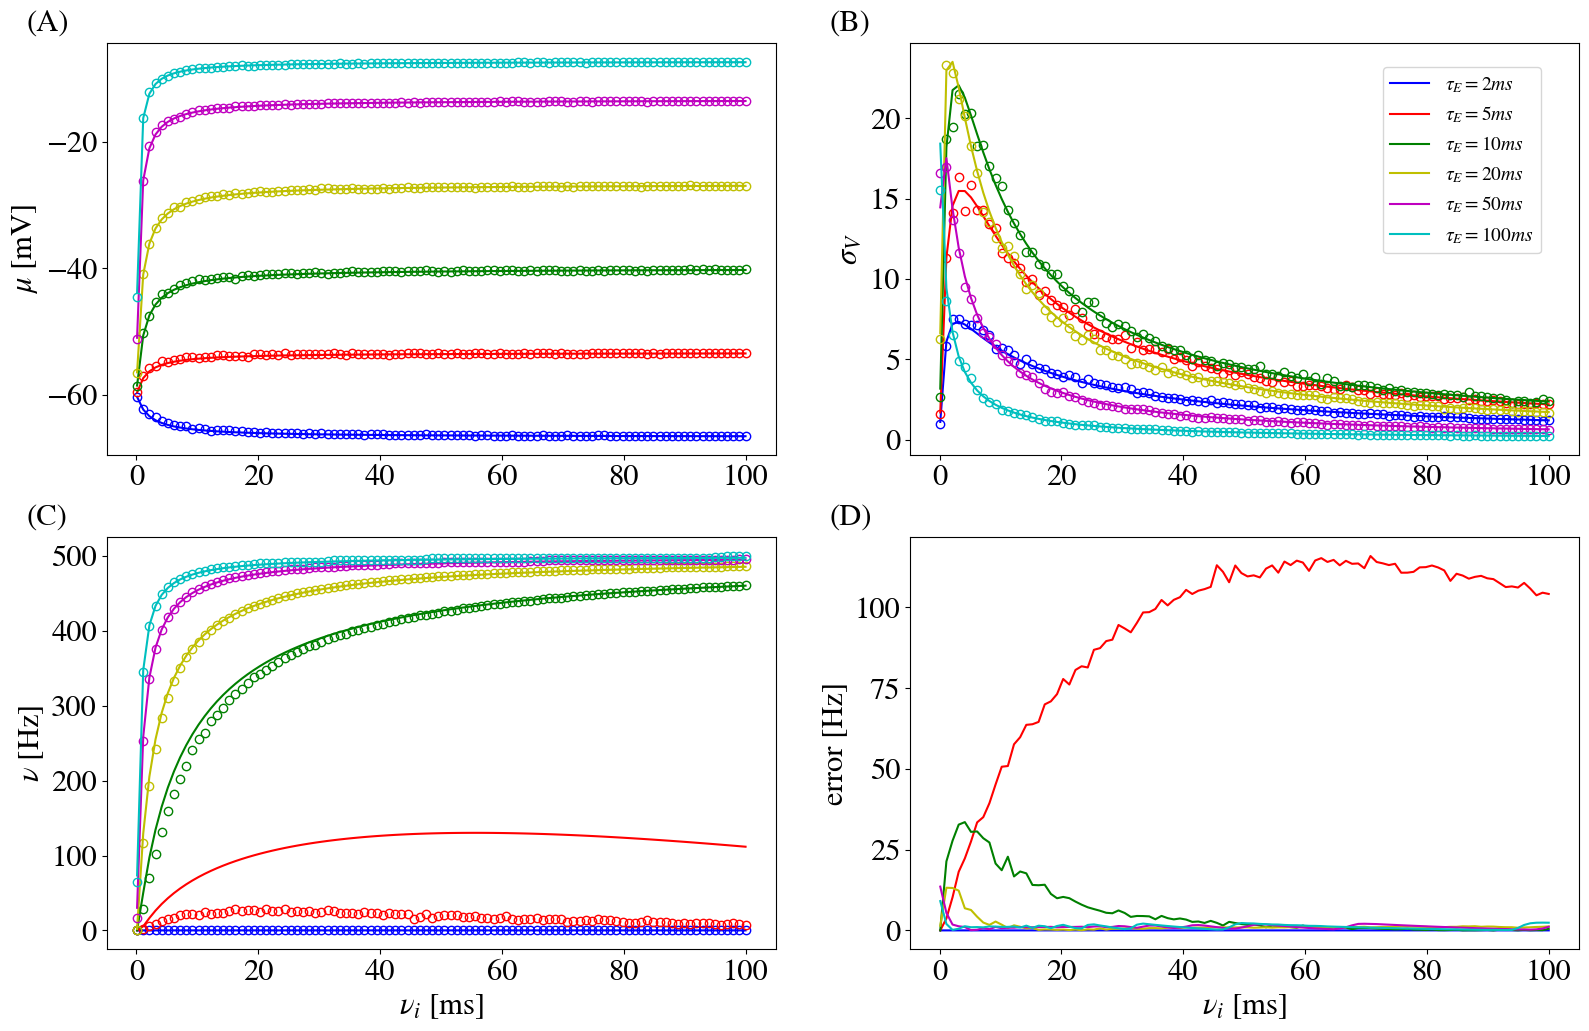

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][0].annotate("(C)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][1].annotate("(D)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$\nu_i$ [ms]')
axs[1][1].set_xlabel(r'$\nu_i$ [ms]')
axs[0][0].set_ylabel(r'$\mu$ [mV]')
axs[0][1].set_ylabel(r'$\sigma_V$')
axs[1][0].set_ylabel(r'$\nu$ [Hz]')
axs[1][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_nu_i*1000, df_mu[vec_tau_E[0]], 'b-', label=r'$\tau_E = 2ms$')
axs[0][0].plot(df_mu_sim["nu"], df_mu_sim[vec_tau_label[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_mu[vec_tau_E[1]], 'r-', label=r'$\tau_E = 5ms$')
axs[0][0].plot(df_mu_sim["nu"], df_mu_sim[vec_tau_label[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_mu[vec_tau_E[2]], 'g-', label=r'$\tau_E = 10ms$')
axs[0][0].plot(df_mu_sim["nu"], df_mu_sim[vec_tau_label[2]], 'go', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_mu[vec_tau_E[3]], 'y-', label=r'$\tau_E = 20ms$')
axs[0][0].plot(df_mu_sim["nu"], df_mu_sim[vec_tau_label[3]], 'yo', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_mu[vec_tau_E[4]], 'm-', label=r'$\tau_E = 50ms$')
axs[0][0].plot(df_mu_sim["nu"], df_mu_sim[vec_tau_label[4]], 'mo', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_mu[vec_tau_E[5]], 'c-', label=r'$\tau_E = 100ms$')
axs[0][0].plot(df_mu_sim["nu"], df_mu_sim[vec_tau_label[5]], 'co', markerfacecolor='none')

axs[0][1].plot(vec_nu_i*1000, df_sigma_V[vec_tau_E[0]]**2/2, 'b-')
axs[0][1].plot(df_sigma_V_sim["nu"], df_sigma_V_sim[vec_tau_label[0]], 'bo', markerfacecolor='none')
axs[0][1].plot(vec_nu_i*1000, df_sigma_V[vec_tau_E[1]]**2/2, 'r-')
axs[0][1].plot(df_sigma_V_sim["nu"], df_sigma_V_sim[vec_tau_label[1]], 'ro', markerfacecolor='none')
axs[0][1].plot(vec_nu_i*1000, df_sigma_V[vec_tau_E[2]]**2/2, 'g-')
axs[0][1].plot(df_sigma_V_sim["nu"], df_sigma_V_sim[vec_tau_label[2]], 'go', markerfacecolor='none')
axs[0][1].plot(vec_nu_i*1000, df_sigma_V[vec_tau_E[3]]**2/2, 'y-')
axs[0][1].plot(df_sigma_V_sim["nu"], df_sigma_V_sim[vec_tau_label[3]], 'yo', markerfacecolor='none')
axs[0][1].plot(vec_nu_i*1000, df_sigma_V[vec_tau_E[4]]**2/2, 'm-')
axs[0][1].plot(df_sigma_V_sim["nu"], df_sigma_V_sim[vec_tau_label[4]], 'mo', markerfacecolor='none')
axs[0][1].plot(vec_nu_i*1000, df_sigma_V[vec_tau_E[5]]**2/2, 'c-')
axs[0][1].plot(df_sigma_V_sim["nu"], df_sigma_V_sim[vec_tau_label[5]], 'co', markerfacecolor='none')

axs[1][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[0]]*1000, 'b-')
axs[1][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[0]], 'bo', markerfacecolor='none')
axs[1][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[1]]*1000, 'r-')
axs[1][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[1]], 'ro', markerfacecolor='none')
axs[1][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[2]]*1000, 'g-')
axs[1][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[2]], 'go', markerfacecolor='none')
axs[1][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[3]]*1000, 'y-')
axs[1][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[3]], 'yo', markerfacecolor='none')
axs[1][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[4]]*1000, 'm-')
axs[1][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[4]], 'mo', markerfacecolor='none')
axs[1][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[5]]*1000, 'c-')
axs[1][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[5]], 'co', markerfacecolor='none')

axs[1][1].plot(vec_nu_i*1000, df_error[vec_tau_E[0]], 'b-')
axs[1][1].plot(vec_nu_i*1000, df_error[vec_tau_E[1]], 'r-')
axs[1][1].plot(vec_nu_i*1000, df_error[vec_tau_E[2]], 'g-')
axs[1][1].plot(vec_nu_i*1000, df_error[vec_tau_E[3]], 'y-')
axs[1][1].plot(vec_nu_i*1000, df_error[vec_tau_E[4]], 'm-')
axs[1][1].plot(vec_nu_i*1000, df_error[vec_tau_E[5]], 'c-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})